In [17]:
# loading required env vars
import os
env_vars = !cat .env
for var in env_vars:
    if var:
        key, value = var.split('=', 1)
        os.environ[key] = value

from main import *
import seaborn as sns

reports = time_in_status_per_key()


|████████████████████████████████████████| 194/194 [100%] in 2:48.2 (1.16/s)    
|████████████████████████████████████████| 94/94 [100%] in 1:26.9 (1.09/s)      


In [29]:
(duration, cfd) = reports
report_name, report_content = duration
data = pd.DataFrame([x[:-1] for x in report_content[1:]], columns=report_content[0][:-1])
data = data[data['assignee']!='']  # no assignee are dismissed issues
data['resolved_week'] = data['resolved'].dt.isocalendar().week  # per week

,key,assignee,created,resolved,to do,on hold,in progress,code review,broadcast,done
0,FBO-1556,luana.santos@loggi.com,2022-12-19 11:02:41.552,2023-01-09 10:54:32.968,8 days 00:17:44.390000,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days,0 days
1,FBO-1519,leonardo.machado@loggi.com,2022-11-24 18:24:08.364,2023-01-09 11:41:19.679,0 days 00:00:23.646000,5 days 22:49:34.428000,13 days 01:43:54.485000,5 days 17:00:51.908000,0 days,0 days
2,FBO-1518,jorge.silvestre@loggi.com,2022-11-24 18:18:59.611,2023-01-09 11:43:13.042,17 days 16:54:12.940000,0 days 00:00:00,12 days 00:31:44.231000,5 days 00:07:56.796000,0 days,0 days
3,FBO-1569,leonardo.machado@loggi.com,2022-12-29 09:37:34.647,2023-01-09 11:46:17.358,0 days 00:00:00.450000,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days,0 days
4,FBO-1542,leonardo.oliveira@loggi.com,2022-12-09 15:54:58.223,2023-01-10 11:03:55.074,9 days 19:41:48.546000,0 days 00:00:00,6 days 08:06:13.058000,2 days 16:55:27.521000,0 days,0 days
...,...,...,...,...,...,...,...,...,...,...
83,FBO-1623,yara.oliveira@loggi.com,2023-01-23 17:38:10.137,2023-03-07 11:42:20.175,0 days 17:28:24.599000,14 days 10:11:59.455000,15 days 17:39:45.767000,7 days 20:57:57.238000,0 days,0 days
84,FBO-1626,leonardo.oliveira@loggi.com,2023-01-23 19:12:56.387,2023-03-13 11:08:26.744,30 days 23:39:41.263000,0 days 00:00:00,3 days 22:59:03.790000,0 days 16:10:17.761000,0 days,0 days
87,FBO-1640,leonardo.machado@loggi.com,2023-01-30 19:30:47.381,2023-03-21 11:53:11.626,43 days 21:36:14.758000,0 days 00:00:00,0 days 16:03:14.558000,1 days 06:11:10.243000,0 days,0 days
88,FBO-1585,luis.teixeira@loggi.com,2023-01-09 16:38:30.897,2023-03-24 18:14:21.357,73 days 23:42:24.510000,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days,0 days


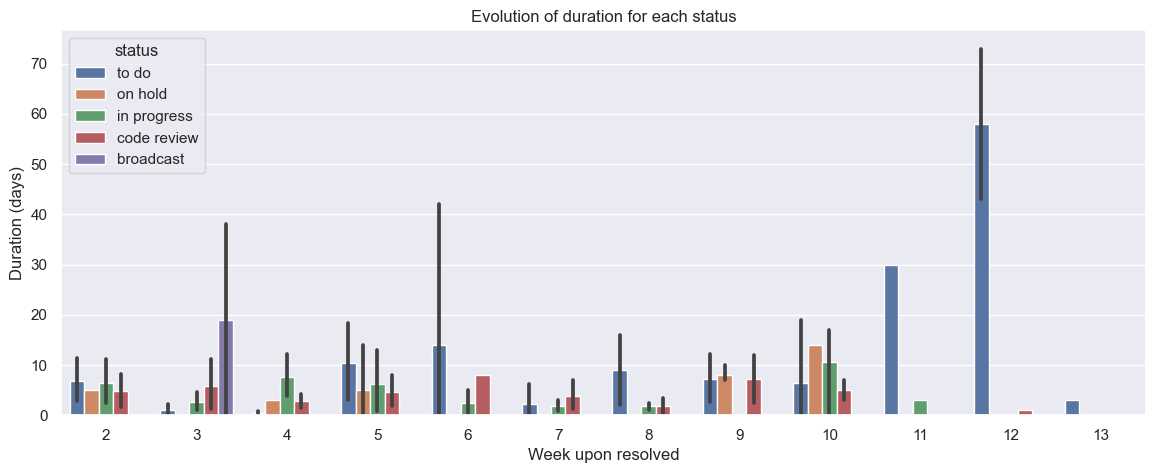

In [63]:
df = data[['resolved_week'] + statuses_available]
df_long = df.melt(
    id_vars=['resolved_week'],
    value_vars=statuses_available,
    var_name='status',
    value_name='duration'
)
df_long = df_long[df_long['duration'] != pd.Timedelta(0, unit='s')]

sns.set_theme(rc={'figure.figsize':(14,5)})
ax = sns.barplot(
    df_long,
    x='resolved_week',
    y=df_long['duration'].dt.days,
    hue='status'
)
ax.set_xlabel('Week upon resolved')
ax.set_ylabel('Duration (days)')
ax.set_title('Evolution of duration for each status')
plt.show()
